Depending who we're making the graphs for, we have two kinds of data visualization:

* Exploratory data visualization: we create graphs for ourselves to better understand and explore data.
* Explanatory data visualization: we create graphs for others to inform, make a point, or tell a story.

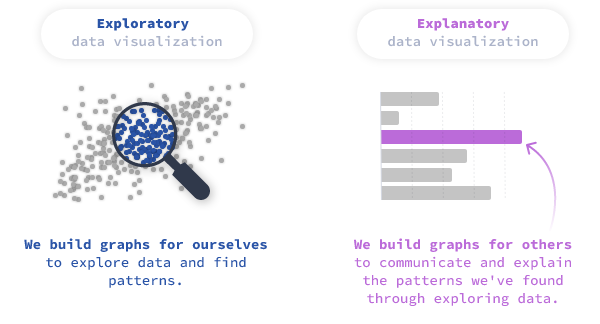

We're going to learn the following:

* How to better create graphs for an audience by using **information design principles**.
* The elements of a story and how to create storytelling data visualizations with matplotlib.
* How to create visual patterns using **Gestalt principles**.
* How to guide the audience's attention with **pre-attentive attributes**.
* How to use matplotlib built-in styles — with a case study on the **FiveThirtyEight style**.

Below, we see a gallery of the data visualizations that we're going to build together throughout 

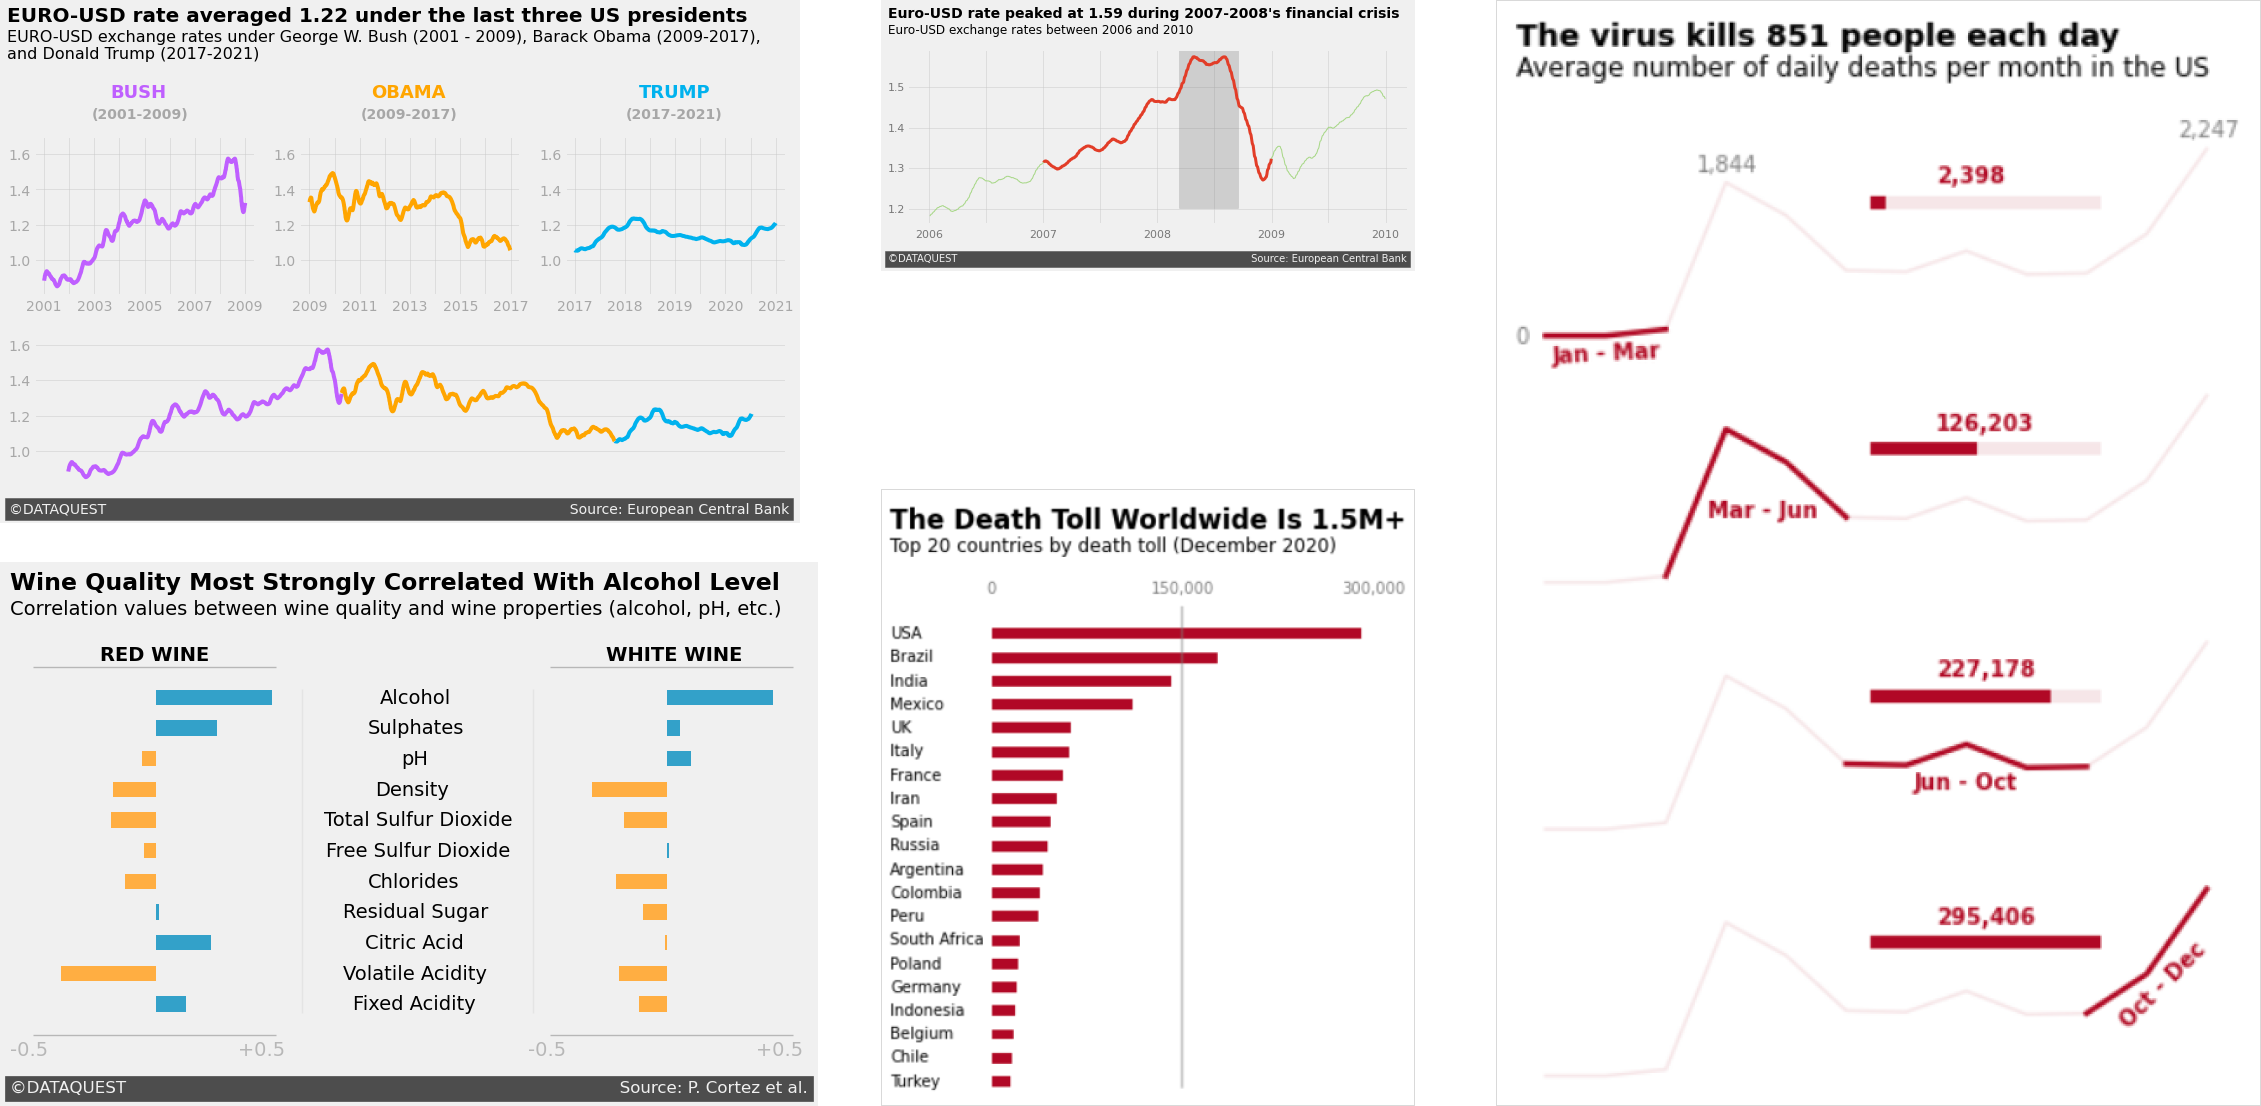

Let's say we're data journalists, and we're working on an article about the coronavirus. Our goal is to make readers more aware of how devastating this virus is — the assumption is that we're writing the article in December 2020, when the coronavirus was still fairly new.

Although unpleasant, we want to make readers more aware that people are dying because of this virus. To that end, we want to include a graph in the article that shows the top 20 countries by the number of deaths.

We've already collected the data and added it in the `top20_deathtoll.csv` file (the data was collected from [Worldometer](https://www.worldometers.info/) on December 8, 2020):

In [1]:
import pandas as pd
top20_deathtoll = pd.read_csv('top20_deathtoll.csv')
top20_deathtoll

Country_Other  Total_Deaths
0         Turkey       15103.0
1          Chile       15663.0
2        Belgium       17386.0
3      Indonesia       18000.0
4        Germany       19539.0
5         Poland       20592.0
6   South Africa       22249.0
7           Peru       36324.0
8       Colombia       37995.0
9      Argentina       39888.0
10        Russia       44159.0
11         Spain       46646.0
12          Iran       50917.0
13        France       55521.0
14         Italy       60606.0
15            UK       61434.0
16        Mexico      110074.0
17         India      141005.0
18        Brazil      177388.0
19           USA      290798.0

First, we need to decide which type of graph to use. To make a good decision, we need to choose a graph that our audience can easily understand.

Ease of understanding often comes from familiarity. If people already know how to read a bar plot, they can immediately start reading the data on the graph. If they aren't familiar with a bar plot, they first need to figure out how to read one.

The **familiarity principle** typically favors simple graphs over complicated, eye-catching graphs. As data scientists, we use visuals to communicate data correctly and efficiently. Our primary aim is not to impress the audience on artistic grounds.

To display the top 20 countries by number of deaths, a horizontal bar plot should work well enough — let's assume our audience is familiar with this kind of graph.

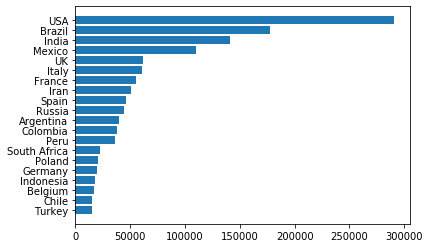

In [2]:
import matplotlib.pyplot as plt
plt.barh(top20_deathtoll['Country_Other'],top20_deathtoll['Total_Deaths'])
plt.show()

This graph is our starting point. We're going to learn how to design it for our audience 

To make the changes we want, we'll use matplotlib's object-oriented interface. Matplotlib has two interfaces:

* A **functional interface**: we use functions to create and modify plots.
* An **object-oriented (OO) interface**: we use methods to create and modify plots.

We used the functional approach when we called the function `plt.barh()` `plt.plot()`, `plt.scatter()`, `plt.title()`, `plt.xlim()`, etc.

The functional interface is simpler and easier to use. It comes in handy in the exploratory data visualization workflow, where we need to create graphs fast. But the OO interface offers more power and flexibility in graph editing.

To create a graph using the OO interface, we use the `plt.subplots()` function, which generates an empty plot and returns a `tuple` of two objects:

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27aad2cf208>)

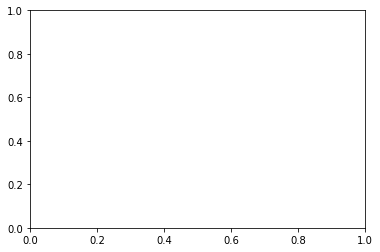

In [3]:
plt.subplots()

We assign the two objects inside the tuple to variables `fig` and `ax`:

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


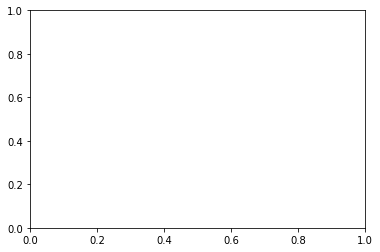

In [4]:
fig, ax = plt.subplots()
print(type(fig))
print(type(ax))

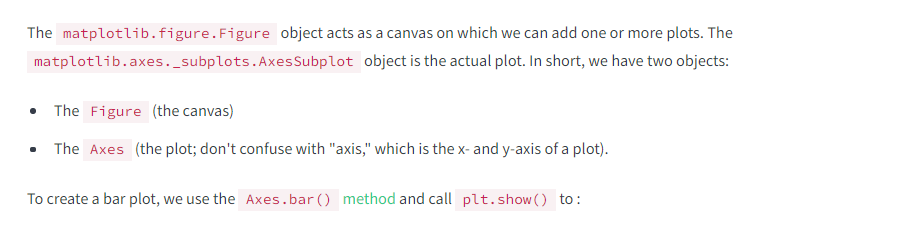

<BarContainer object of 3 artists>

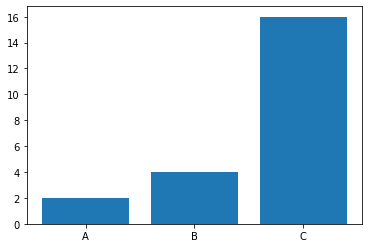

In [5]:
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])

Let's recreate our horizontal bar plot about coronavirus using the OO interface.

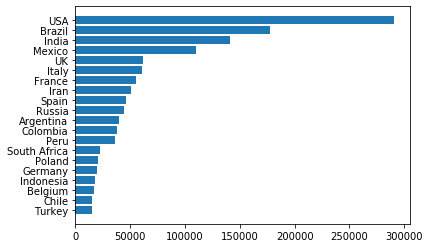

In [6]:
fig, ax = plt.subplots()

ax.barh(top20_deathtoll['Country_Other'],top20_deathtoll['Total_Deaths'])
plt.show()

We know that a large part of our audience will read the article on a mobile device. This means our graph needs to have mobile-friendly proportions: small width, larger height. Our graph currently has a small height and a larger width.

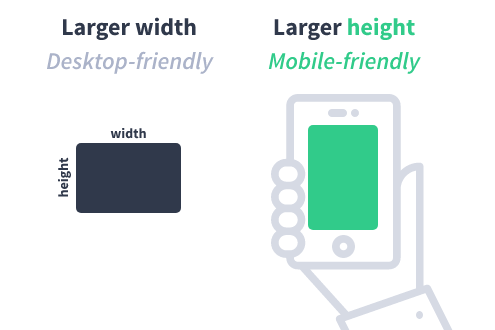

To change the proportions, we can use the `figsize` parameter inside the `plt.subplots(figsize=(width, height))` function:

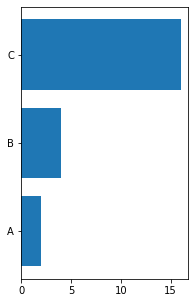

In [7]:
fig, ax = plt.subplots(figsize=(3, 5))
ax.barh(['A', 'B', 'C'],
        [2, 4, 16])
plt.show()

Recreate the horizontal bar plot with a width of `4.5` inches and a height of `6` inches.

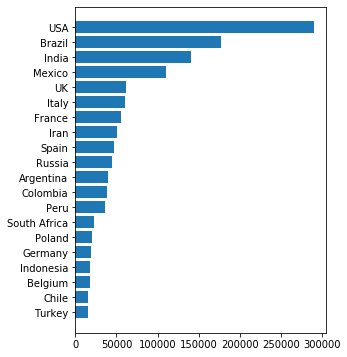

In [8]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
         top20_deathtoll['Total_Deaths'])
plt.show()

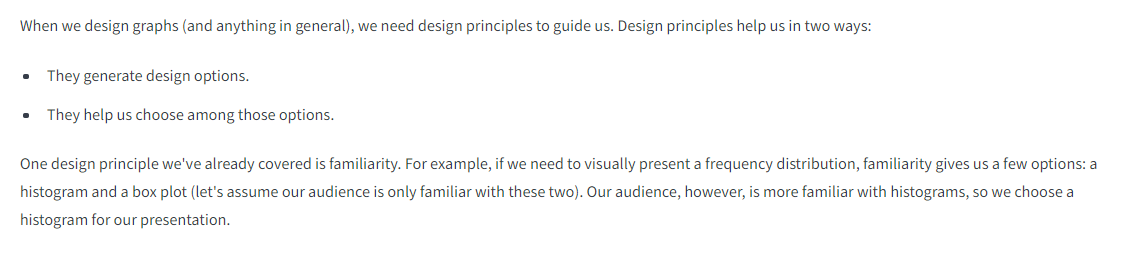

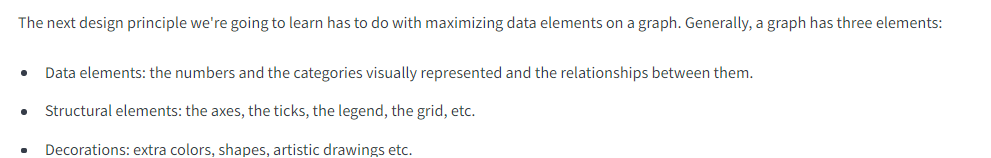

Maximizing the data elements ensures the audience's attention is on the data — not on structure or decorations. 

Below, we see how removing structural elements and decorations can maximize data elements (GIF source: Darkhorse Analytics):

In [9]:
from IPython.display import Image

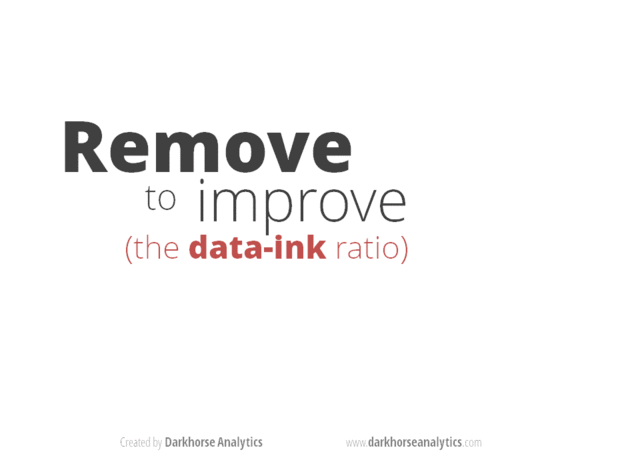

In [10]:
Image("data-ink.gif")

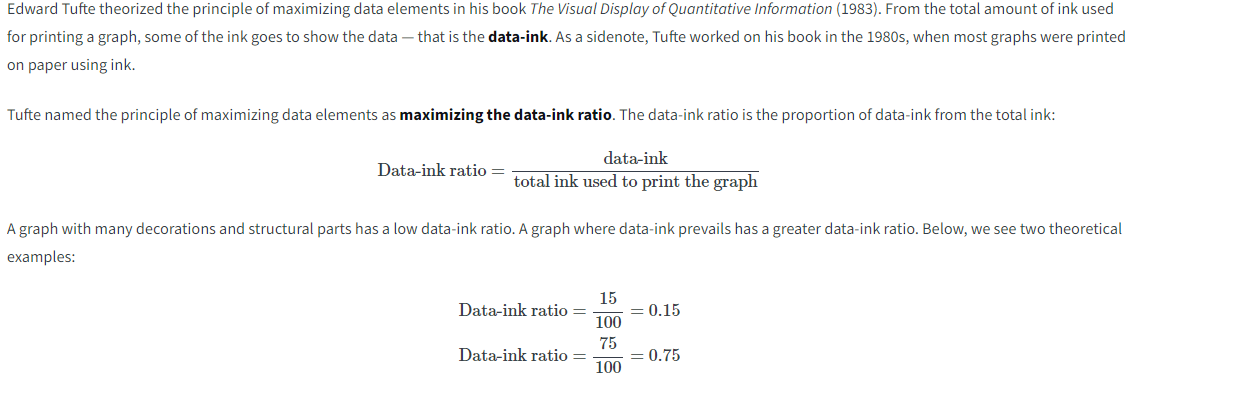

We should try to maximize the data-ink ratio within reason. Some structural elements are necessary; otherwise, the graph can become unreadable. Decorations are optional by definition, but they can help prove a point in some cases. 

To maximize data ink, we can do the following:

* Erase non-data ink
* Erase redundant data-ink

Let's return to our horizontal bar plot and see how we can maximize the data-ink ratio.

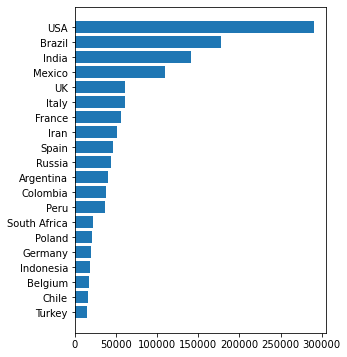

We begin by identifying the data-ink that we can't remove without losing information (this is the core of the graph):

* The bars
* The y-tick labels (the country names)
* The x-tick labels (the number of deaths)

There are two structural elements that constitute non-data ink — we can remove them without losing any important information:

* The axes
* The ticks

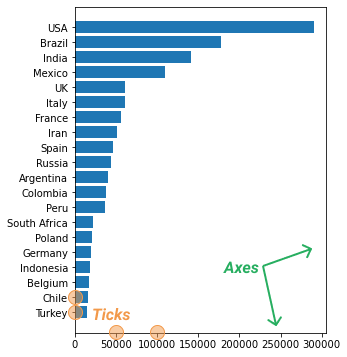

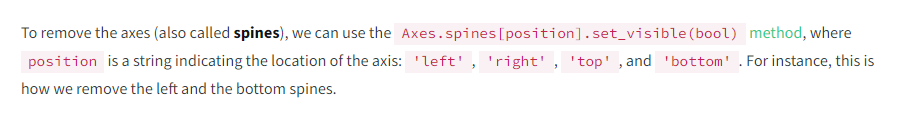

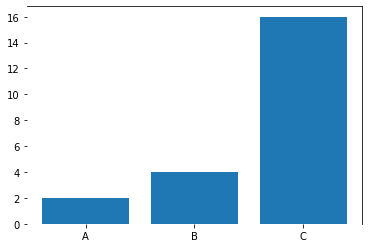

In [11]:
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

If we want to remove all the spines, the fastest way is to use a `for` loop:

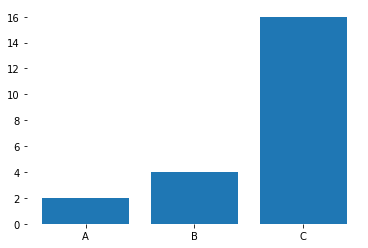

In [12]:
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

plt.show()

To remove the ticks, we can use the [`Axes.tick_params(bottom, top, left, right)` method](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.tick_params.html). Below, we only need to remove the left and bottom ticks:

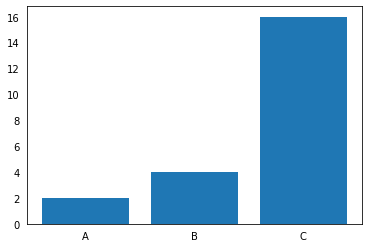

In [13]:
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])

ax.tick_params(bottom=False, left=False)
plt.show()

**Task**

* Remove all four spines from the horizontal bar plot.
* Remove the bottom and left ticks from the horizontal bar plot.

**Answer**

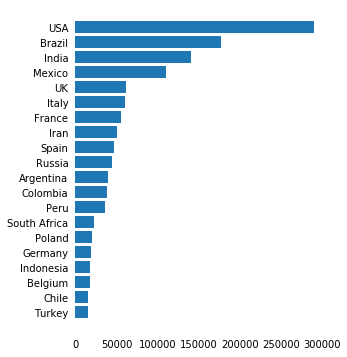

In [14]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
         top20_deathtoll['Total_Deaths'])
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.tick_params(bottom=False, left=False)
plt.show()

Above, we erased some non-data ink from our graph. Another way to remove more ink is to erase redundant data-ink. 

For our horizontal bar plot, we can make the bars less thick and remove some of the x-tick labels (we can leave only the labels 0, 150000, and 300000).

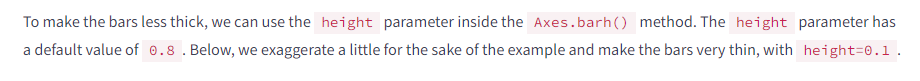

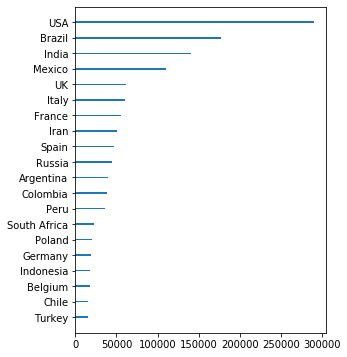

In [15]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.1)
plt.show()

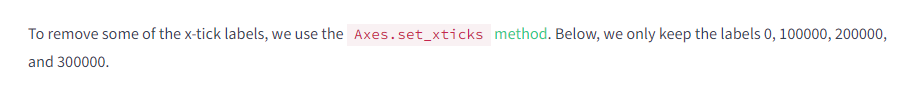

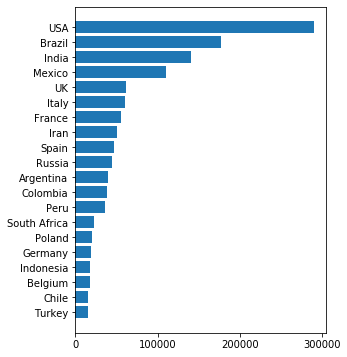

In [16]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'])
ax.set_xticks([0, 100000, 200000, 300000])
plt.show()

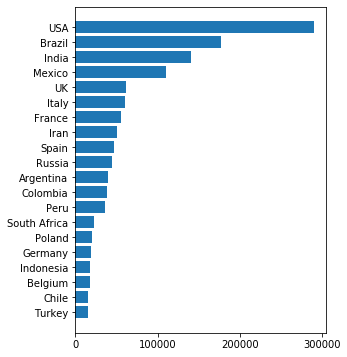

In [18]:
# Alternate of above--- Setting x ticks

fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'])
plt.xticks([0, 100000, 200000, 300000])
plt.show()

**Task**

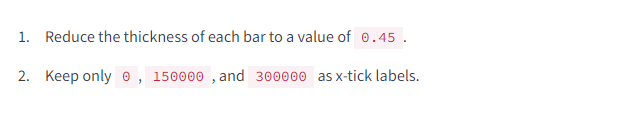

**Answer**

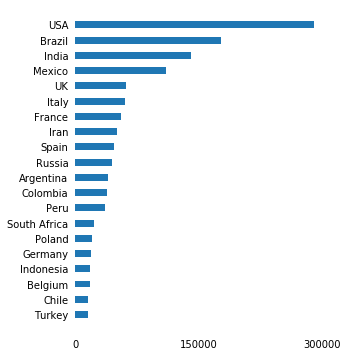

In [19]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45)

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_xticks([0, 150000, 300000])
plt.show()

So far, we've applied two design principles:

* We chose a horizontal bar graph using the familiarity principle.
* We modified the graph using the maximizing data-ink ratio principle.

Another aspect that we need to consider is the audience's direction of reading. As they scroll down through our article, they will read (and look at) our graph from top to bottom. More specifically, people usually start from top left and follow a zigzag pattern until they reach bottom right.

One problem with our graph is that the tick labels are located at the bottom. People will immediately see the country names, the bars, but they may get confused about the quantities.

To address that, we're going to move the tick labels at the top of the graph using the [Axes.xaxis.tick_top()](https://matplotlib.org/api/_as_gen/matplotlib.axis.XAxis.tick_top.html) method:

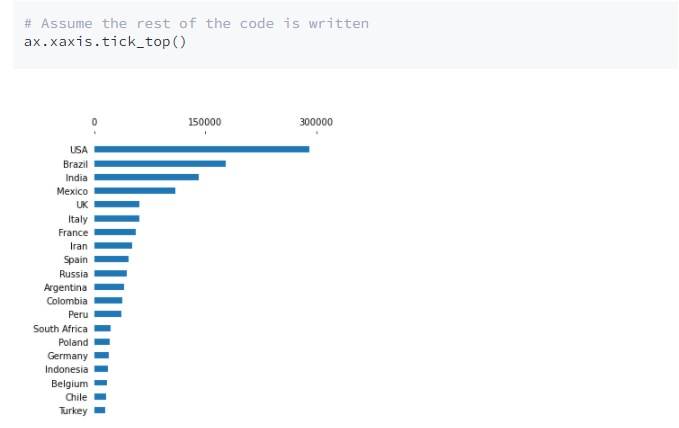

We now see ticks again because we only removed the bottom and left ticks. We now need to remove the top ticks instead of the bottom ones:

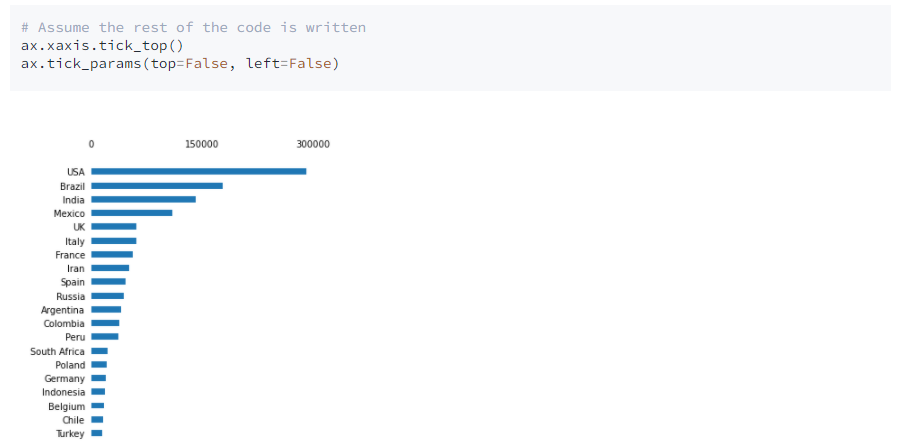

Right now, the first thing people will probably see are the x-tick labels. We want readers to focus on the data, so we'll do two things:

* We'll color the x-tick labels in grey so they don't stand out visually so much.
* We'll color the bars in a shade of red.

To color the x-tick labels, we use the same [`Axes.tick_params()` method](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.tick_params.html). However, we need to call it one more time because we only want to modify the ticks of the x-axis.

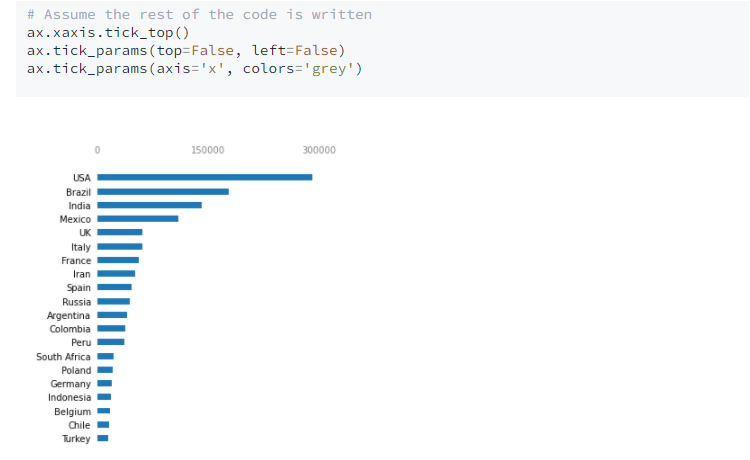

To change the colors of the bar, we use the `color` parameter in the `Axes.barh(color)` method. This parameter accepts **HEX color codes**, and we use `#b00b1e` to get a shade of `red`. (One place where we can get HEX color codes is [here](https://www.color-hex.com/).)

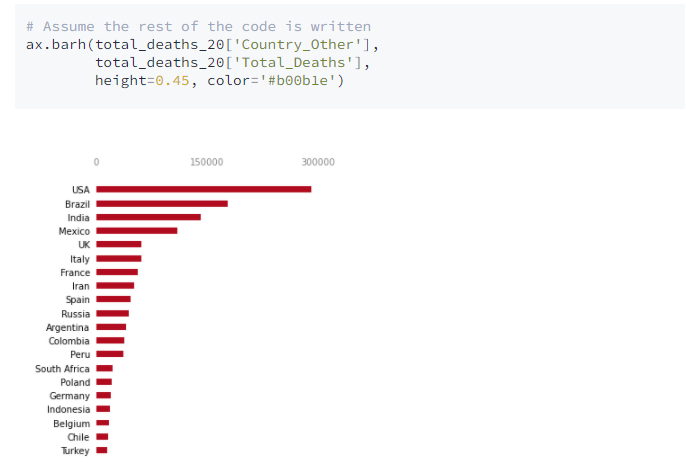

**Task**

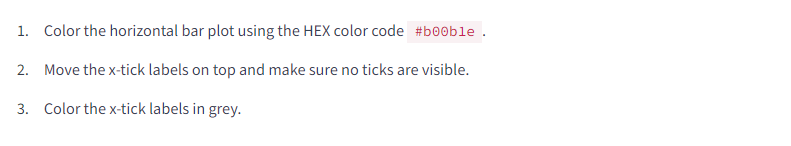

**Answer**

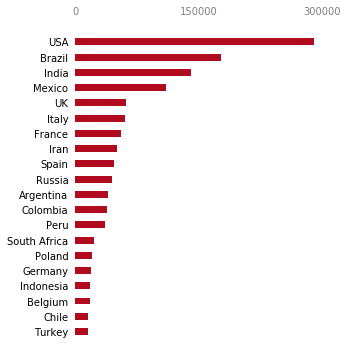

In [20]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#b00b1e')

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

ax.set_xticks([0, 150000, 300000])
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')

plt.show()

If someone looks at our graph, they won't be able to tell what the quantity means. They see the USA has almost 300,000 of something, but what is that something?

Instead of adding an x-axis label, we'll use the title and subtitle area to give the readers the necessary details. More specifically, we will do the following:

* Add a subtitle that explains what the quantity describes and when the data was collected.
* Use the title to show readers more data — we'll report that the death toll worldwide has surpassed 1.5M (data source: [Worldometers](https://www.worldometers.info/)).

Generally, the title must be data ink. If we need to give structural explanations in text, we can use the subtitle. That's because the title is always so noticeable, and we need to leverage that to show more data (and also maximize the data-ink ratio).

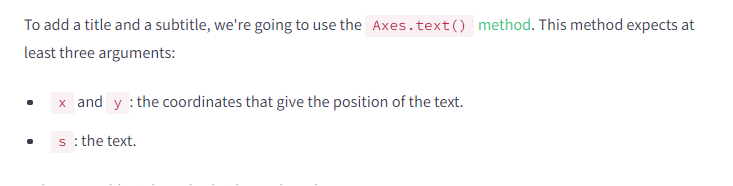

Below, we add a title and subtitle to a bar plot:

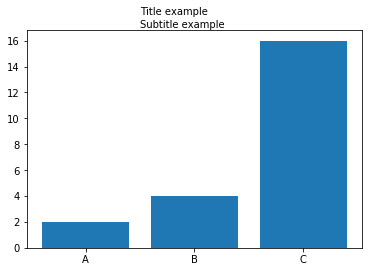

In [21]:
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])
ax.text(x=0.5, y=18, s='Title example')
ax.text(x=0.5, y=17, s='Subtitle example')
plt.show()

The `Axes.text()` method has a `size` parameter we can use to control the text size. Also, it has a `weight` parameter that enables us to **bold** the text.

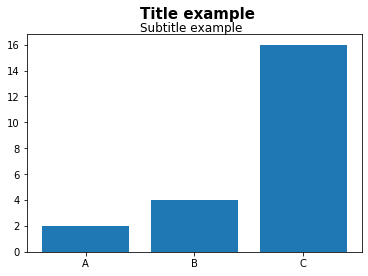

In [22]:
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])
ax.text(x=0.5, y=18, s='Title example',
        size=15, weight='bold')
ax.text(x=0.5, y=17, s='Subtitle example',
        size=12)
plt.show()

For our graph, we're not going to center the text. Instead, we're going to left-align it on the same line with the `South Africa` label.

**Task**

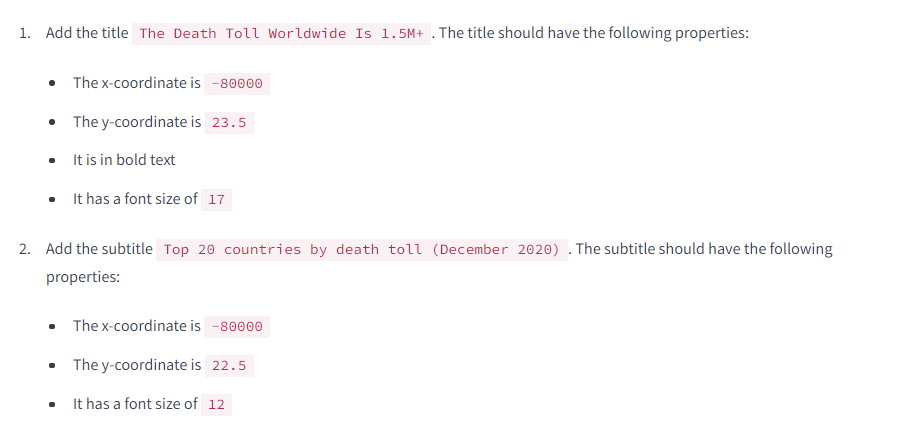

**Answer**

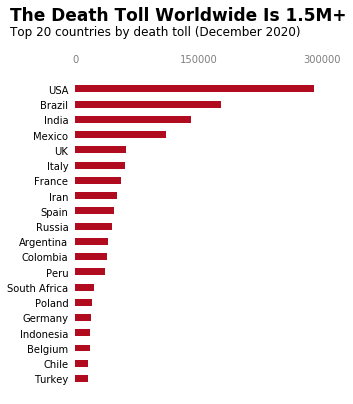

In [23]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#b00b1e')

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([0, 150000, 300000])
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')

ax.text(x=-80000, y=23.5,
        s='The Death Toll Worldwide Is 1.5M+',
        weight='bold', size=17)
ax.text(x=-80000, y=22.5,
        s='Top 20 countries by death toll (December 2020)',
        size=12)

plt.show()

We've come a long way and created a graph that's almost publication-ready. 

Next, we're only going to give it some final touches. First, we'll make the y-tick labels easier to read. We'll add a comma to both 150000 and 300000 to make them more readable — so people don't have to struggle to tell whether it's a 30,000 or a 300,000, for instance.

To make this change, we use the [`Axes.set_xticklabels()` method](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html).

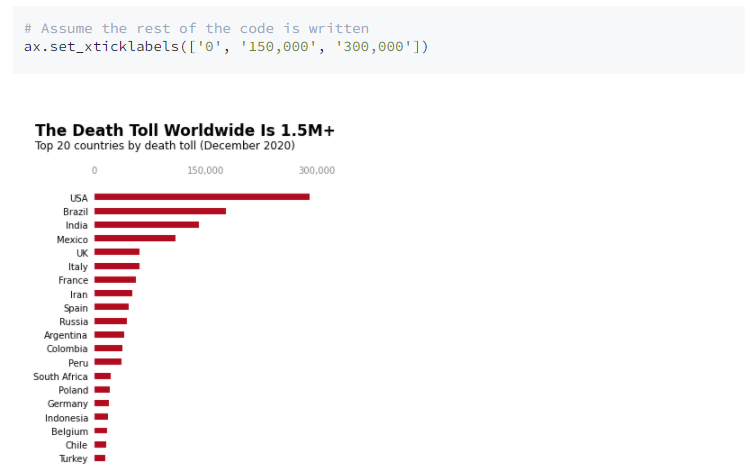

Next, we're going to left-align the y-tick labels (the country names). To do that, we're going to leverage the flexibility of the `Axes.text()` method. First, however, we're going to remove the current labels using the [`Axes.set_yticklabels()` method](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_yticklabels.html).

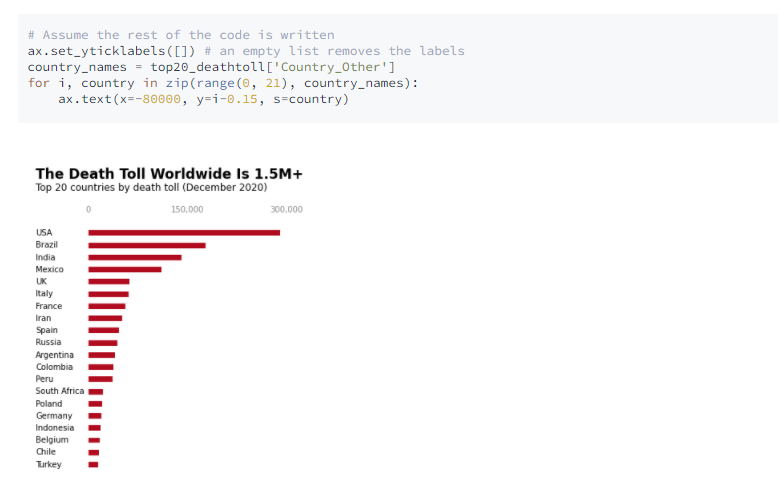

Readers who explore the graph will try to determine the approximate death toll for each country. To help them, we're going to draw a vertical line below the 150,000 value. To do that, we use the [`Axes.vline(x)` method](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axvline.html), where `x` is the x-coordinate where the line begins:

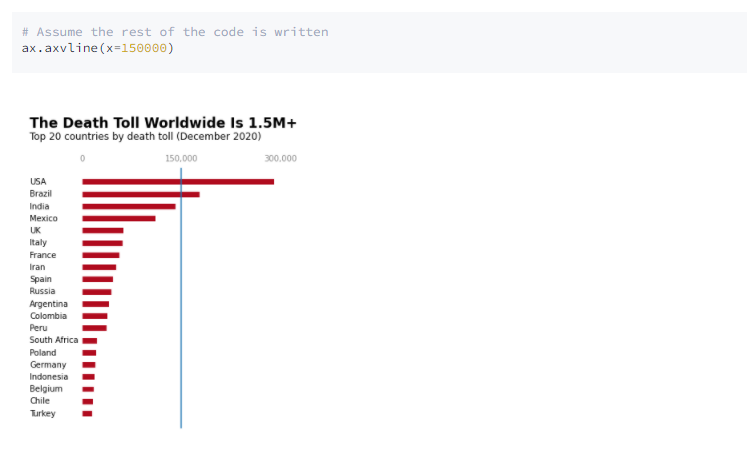

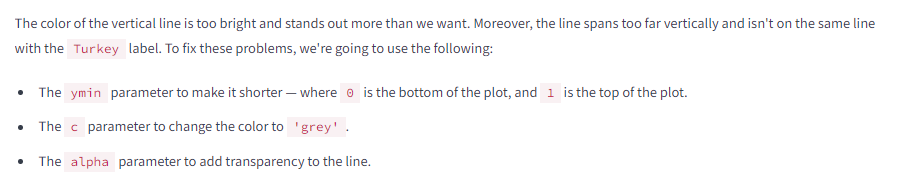

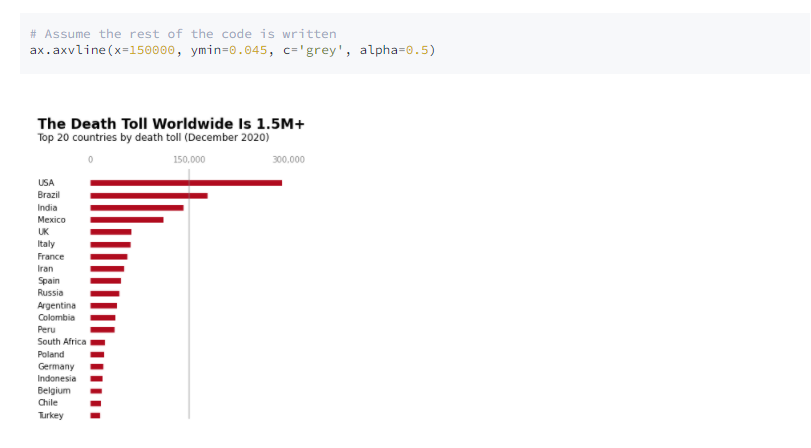

**Task**

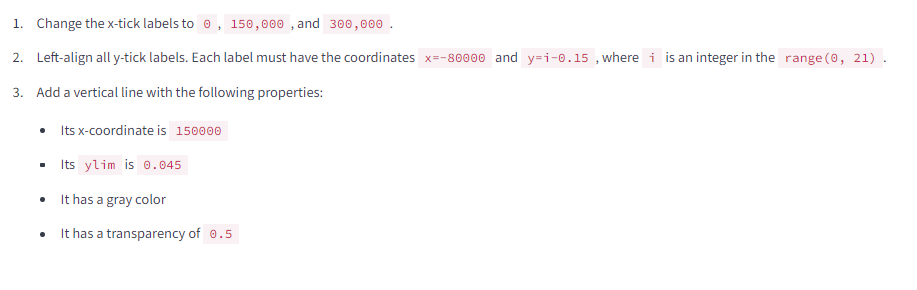

**Answer**

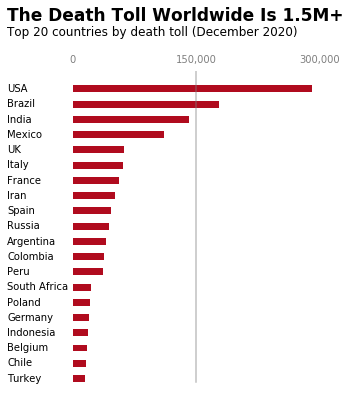

In [24]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#b00b1e')
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([0, 150000, 300000])
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.text(x=-80000, y=23.5,
        s='The Death Toll Worldwide Is 1.5M+',
        weight='bold', size=17)
ax.text(x=-80000, y=22.5,
        s='Top 20 countries by death toll (December 2020)',
        size=12)

ax.set_xticklabels(['0', '150,000', '300,000'])
ax.set_yticklabels([]) # an empty list removes the labels
country_names = top20_deathtoll['Country_Other']
for i, country in zip(range(0, 21), country_names):
    ax.text(x=-80000, y=i-0.15, s=country)
ax.axvline(x=150000, ymin=0.045, c='grey',
           alpha=0.5)

plt.show()

In this file, we learned how to create better graphs for an audience by using information design principles. The two design principles we focused on were the following:

* **Familiarity**: choose what our audience is most familiar with
* **Maximizing** the data-ink ratio